In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#load dataset


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/CS760/OppScrData.xlsx")

In [ ]:
df.head()

,Record ID,Visit ID,PT ID,Clinical F/U interval [d from CT],BMI,BMI >30,Sex,Age at CT,Tobacco,Alcohol abuse,...,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
0,8675,415,6669,907,37.7,Y,Male,73,NaN,NaN,...,,,,,,,,,,
1,2236,525,2915,359,30.1,Y,Female,55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5962,542,5321,412,28.1,N,Female,52,NaN,NaN,...,,,,,,,,,,
3,665,546,1934,2333,25.0,N,Male,60,Yes,NaN,...,,,,,,,,,,
4,478,580,1817,532,22.4,N,Male,88,Yes,NaN,...,,,,,,,,,,


In [ ]:
#get death columns and convert days to years
death=df['DEATH [d from CT]']
dead=death[~np.isnan(death)]
deady=dead/365
age=df['Age at CT']
age_dead=age[~np.isnan(death)]
dead_age=deady+age[~np.isnan(death)]

In [ ]:
#compute the average age at death
dead_age.mean()

71.3655762656886

In [ ]:
#extract clinical data columns
nan_value = float("NaN")

gender=df['Sex']
gender[gender=='Male']=1
gender[gender=='Female']=0
gender_dead=gender[~np.isnan(death)]
BMI=df['BMI']
BMI_dead=BMI[~np.isnan(death)]
Tobacco=df['Tobacco']
Tobacco[Tobacco=='Yes']=1
Tobacco[Tobacco=='No']=0
Tobacco.replace(nan_value,0.5, inplace=True)
Tobacco_dead=Tobacco[~np.isnan(death)]

drink=df['Alcohol abuse']
drink.replace(nan_value,0, inplace=True)
drink[drink!=0]=1
drink_dead=drink[~np.isnan(death)]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykerne

In [ ]:
FU=df['Clinical F/U interval  [d from CT]']
FUy=FU.copy()/365

In [ ]:
#check how many alive people did CT longer than 13.25 years ago.
FU_long=FUy[FUy>13.25]
print(FU_long[np.isnan(death)].shape)
print(FU_long[~np.isnan(death)].shape)
#plt.figure()
#plt.hist(age[FUy>13])

(534,)
(4,)


#Target defination for binary classification to predict if a person can live longer than 13 years.


In [ ]:
target=death.copy()/365
target[target<13]=0
target[FUy>13.25]=1 #90-age[FUy>13.25]

In [ ]:
#clinical outcome columns, can ignore this section.
cvd_d=df['CVD DX Date [d from CT]']
cvd=cvd_d[~np.isnan(cvd_d)]
Hf_d=df['Heart failure DX Date [d from CT]']
Hf=Hf_d[~np.isnan(Hf_d)]
MI_d=df['MI DX Date [d from CT]']
diabT2_d=df['Type 2 Diabetes DX Date [d from CT]']
FNF_d=df['Femoral neck fracture DX Date [d from CT]']
UFF_d=df['Unspec femoral fracture DX Date [d from CT]']
FAF_d=df['Forearm fracture DX Date [d from CT]']
HF_d=df['Humerus fracture DX Date [d from CT]']
PF_d=df['Pathologic fracture DX Date [d from CT]']
AH_d=df['Alzheimers DX Date [d from CT]']
PC_d=df['Primary Cancer Dx [d from CT]']
PCS2_d=df['Primary Cancer Site 2 Dx [d from CT]']


In [ ]:
age_H=Hdata['Age at CT']
CTs_H=Hdata.iloc[:,41:52]

In [ ]:
FRS=df['FRS 10-year risk (%)']
FRS = FRS.astype(str)
FRS= FRS.str.replace("%", "")
FRS = FRS.str.replace("<1", "0.005") # switch <1 to 0.5
FRS = FRS.str.replace(">30", "0.5") # >30 is 5000
FRS= FRS.str.replace("X", '1000') # X is 10000
FRS= FRS.astype(float)
FRS=FRS.replace(1000,nan_value)
FRS_dead=FRS[~np.isnan(death)]*100

In [ ]:
FRAX=df['FRAX 10y Fx Prob (Orange-w/ DXA)']
FRAX_dead=FRAX[~np.isnan(death)]
FRAX_dead[FRAX_dead==FRAX.iloc[17]]='1000'
#FRAX.str.replace(_,'1000')
FRAX_dead=FRAX_dead.astype(float)
FRAX_dead=FRAX_dead.replace(1000,nan_value)

In [ ]:
clinical_data=pd.concat([gender_dead,BMI_dead,drink_dead,Tobacco_dead],axis=1)#FRS_dead,FRAX_dead], axis=1)
clinical_data.head()
clinical_all=pd.concat([gender,BMI,drink,Tobacco],axis=1)#FRS_dead,FRAX_dead], axis=1)


In [ ]:
FU_d=df['Clinical F/U interval  [d from CT]']
FU=FU_d[~np.isnan(death)]
cvd_d=df['CVD DX Date [d from CT]']
cvd=cvd_d[~np.isnan(death)]
#%% CT data
L1=df['L1_HU_BMD']
L1_dead=L1[~np.isnan(death)]
TAT=df['TAT Area (cm2)']
TAT_dead=TAT[~np.isnan(death)]

TB=df['Total Body                Area EA (cm2)']
TB_dead=TB[~np.isnan(death)]

VAT=df['VAT Area (cm2)']
VAT_dead=VAT[~np.isnan(death)]

SAT=df['SAT Area (cm2)']
SAT_dead=SAT[~np.isnan(death)]
VSR=df['VAT/SAT     Ratio']
VSR_dead=VSR[~np.isnan(death)]

Mus=df['Muscle HU']
Mus_dead=Mus[~np.isnan(death)]

MusA=df[' Muscle Area (cm2)']
MusA_dead=MusA[~np.isnan(death)]

L3=df['L3 SMI (cm2/m2)']
L3_dead=L3[~np.isnan(death)]

AoCa=df['AoCa        Agatston']
AoCa_dead=AoCa[~np.isnan(death)]

liver=df['Liver HU    (Median)']
liver_dead=liver[~np.isnan(death)]

In [ ]:
CTs_all=df.iloc[:,41:52]
CTs_dead=CTs_all[~np.isnan(death)].copy()
CTs_dead.drop(L3_dead[np.isnan(L3_dead)].index,inplace = True)

#run it for data selection for biological age prediction


In [ ]:
result=pd.concat([CTs_all, age], axis=1) #clinical_data,
#result=pd.concat([CTs_H, age_H], axis=1)
result.shape


(9223, 12)

#run it for data selection for binary classification


In [ ]:
result=pd.concat([CTs_all,target], axis=1) #clinical_all,,
#result=pd.concat([CTs_H, age_H], axis=1)
result.drop(target[target>1].index,inplace=True)
#target[target==1].sum()
result.shape
result.head()

,Sex,BMI,Alcohol abuse,Tobacco,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),VAT/SAT Ratio,Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),DEATH [d from CT]
0,1,37.7,0,0.5,135.0,NaN,NaN,NaN,NaN,NaN,18.242557,170.053192,58.717526,5473.561,35,0.0
1,0,30.1,0,0.5,192.0,485.502857,694.314286,183.497143,302.008571,0.607589,16.150123,123.968745,48.413187,2709.064,52,0.0
2,0,28.1,0,0.5,256.0,490.054545,706.051515,159.706061,330.348485,0.483447,23.337964,136.566261,50.101332,0.000,54,NaN
3,1,25.0,0,1.0,149.0,289.108108,584.489189,144.002703,145.102703,0.992419,30.804567,212.296726,69.115854,2586.575,57,0.0
4,1,22.4,0,1.0,106.0,315.530769,588.892308,202.317949,113.212821,1.787059,-3.181874,168.923950,47.814581,431.519,53,0.0


#drop nan values in the data

In [ ]:

result.dropna(inplace = True)
result.shape


(8878, 12)

In [ ]:
result.iloc[:,-1].sum()

506138

In [ ]:
nan_value = float("NaN")
result.replace(" ", nan_value, inplace=True)
liver_dead=result['Liver HU    (Median)']
liver_dead=pd.to_numeric(liver_dead)#.astype(float,errors = 'coerce')
liver_dead
#CTs_dead.drop(liver_dead[np.isnan(liver_dead)].index,inplace = True)
#deady.drop(liver_dead[np.isnan(liver_dead)].index,inplace = True)

result.dropna(inplace = True)
result.shape


1       52.0
2       54.0
3       57.0
4       53.0
5       54.0
        ... 
9218    38.0
9219    54.0
9220    45.0
9221    44.0
9222    54.0
Name: Liver HU    (Median), Length: 8892, dtype: float64

#pair plot (can ignore it)

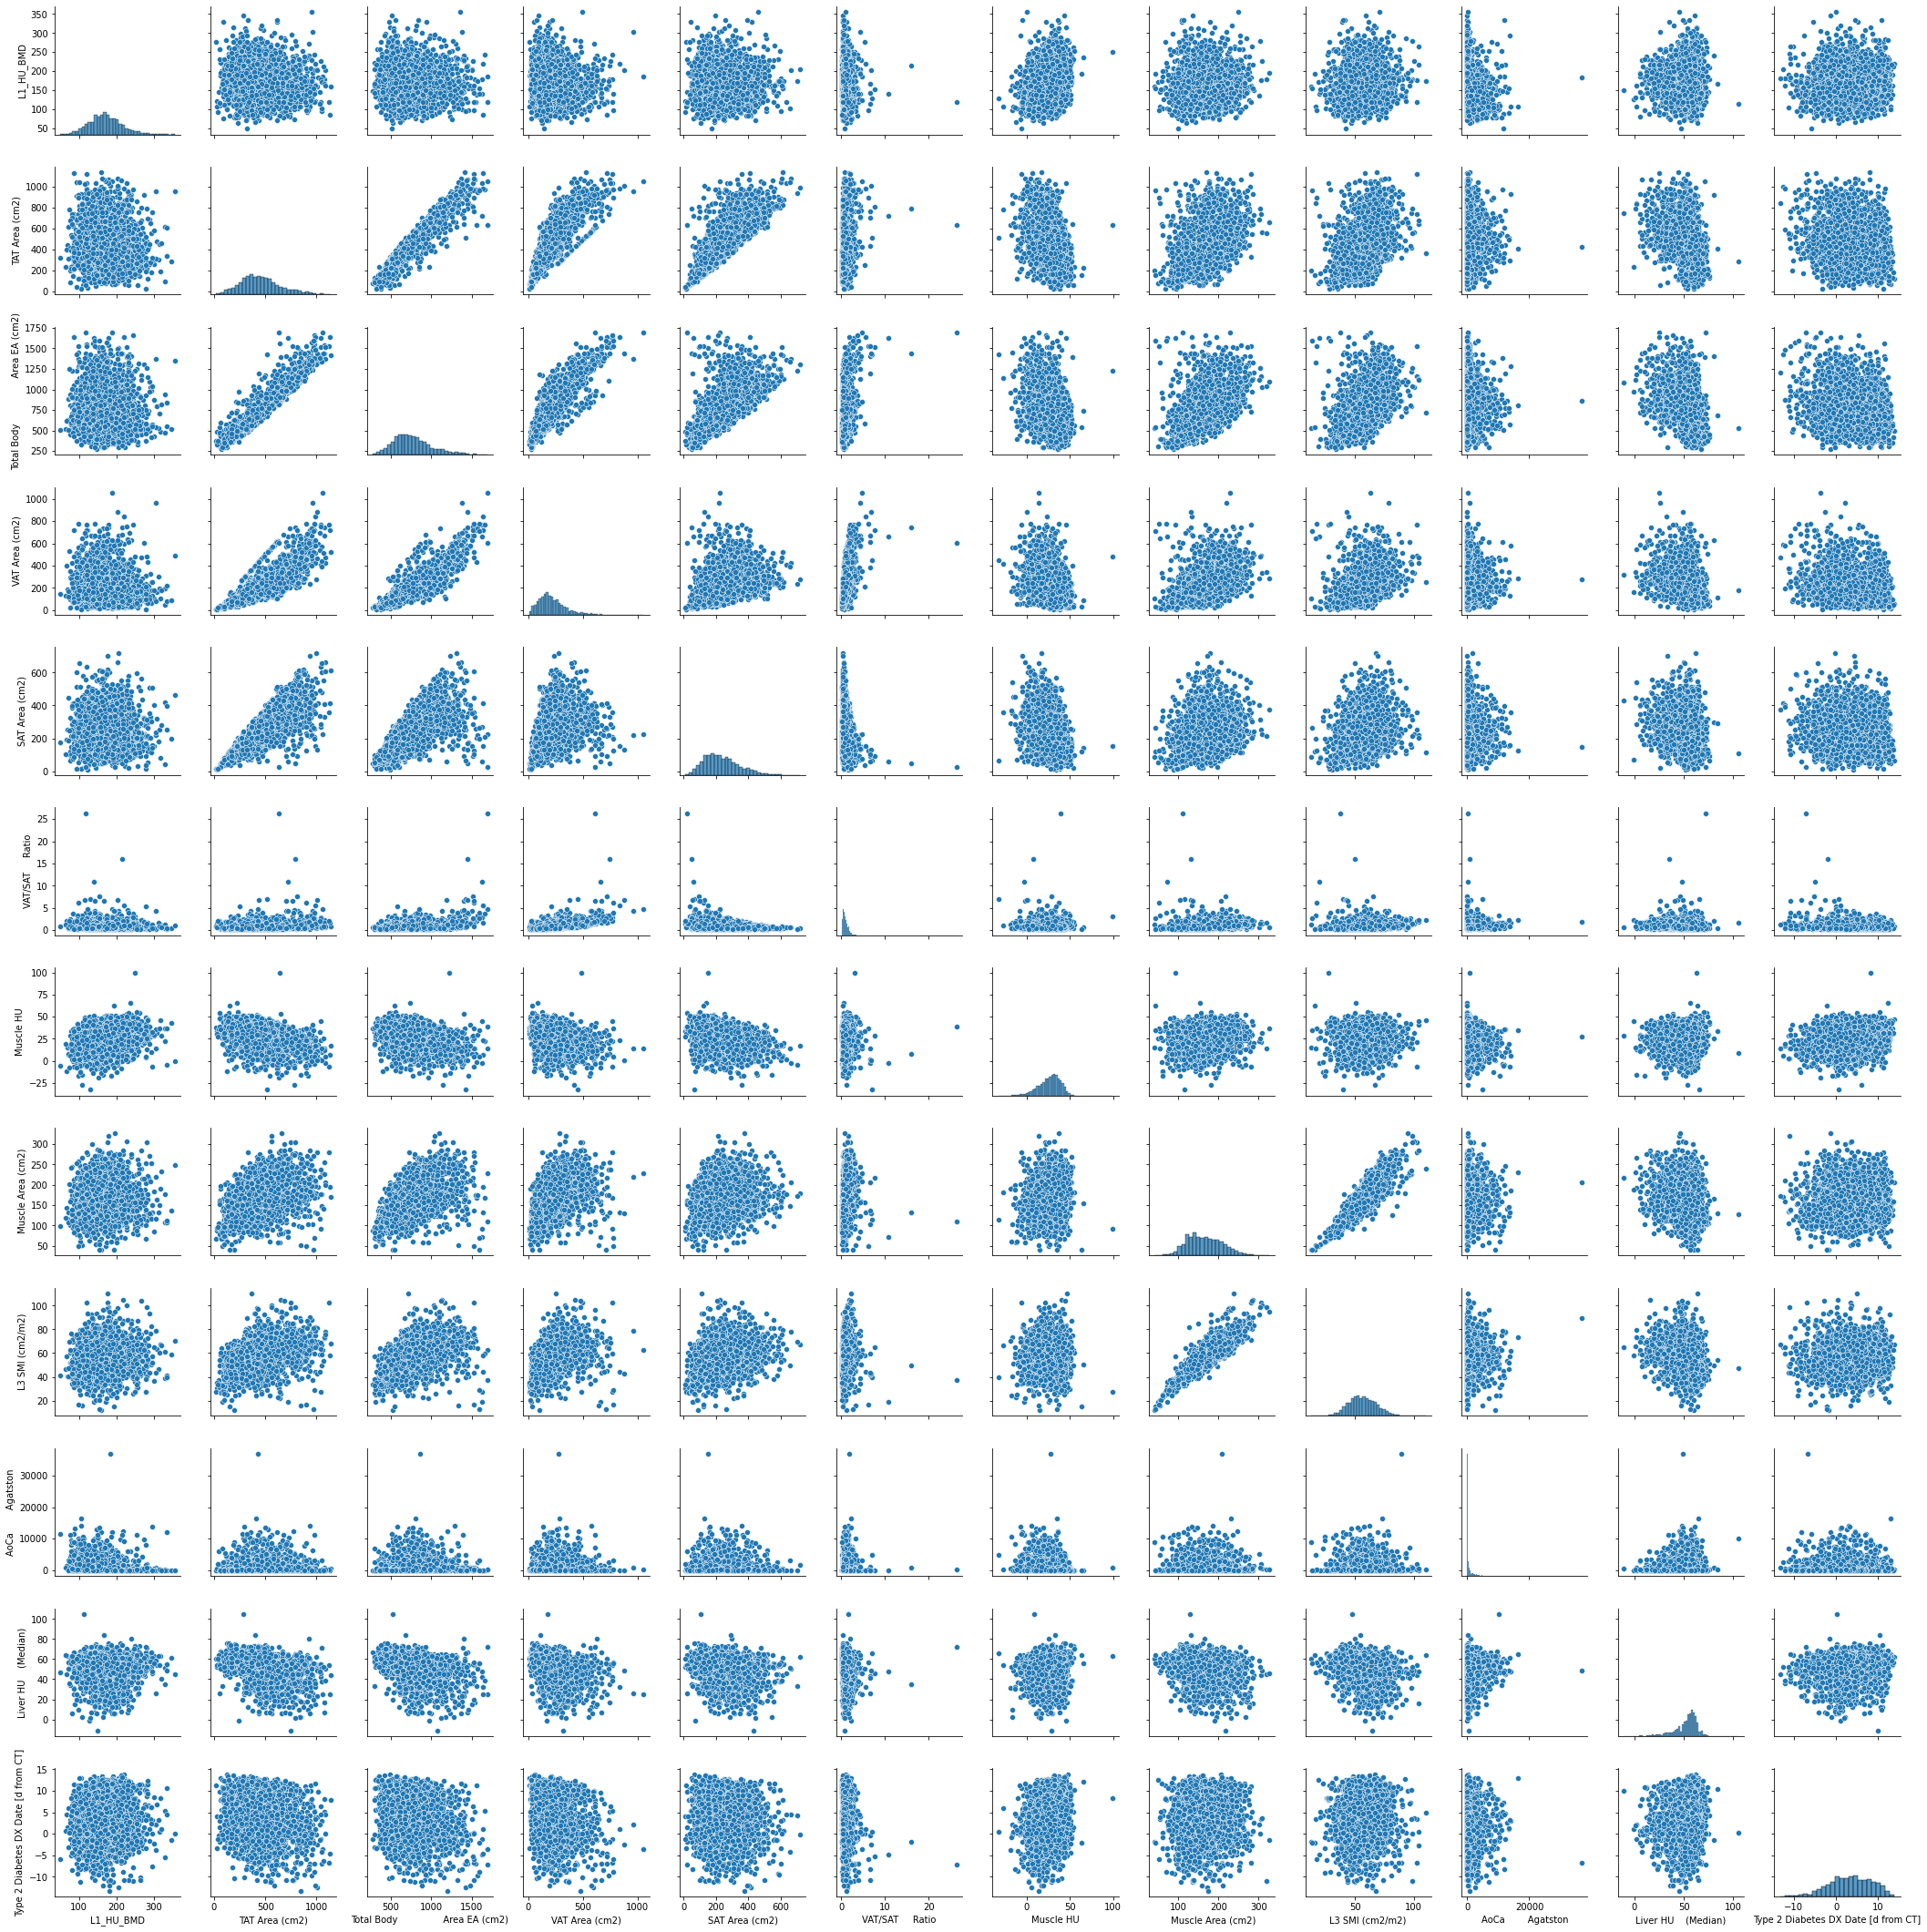

In [ ]:
sns.pairplot(result
)

#data splitting for training and testing

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

yc=result.iloc[:,-1]
y=yc
#y=label_encoder.fit_transform(pd.cut(yc, 10, retbins=True)[0])
X=result.iloc[:,:-1]
#X=np.log(result.iloc[:,:-1]+200*np.ones(result.iloc[:,:-1].shape))



In [ ]:
from sklearn.model_selection import train_test_split
#y=result.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.1, shuffle=True)

#function to plot model results

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import sklearn.metrics
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')
CV = []
R2_train = []
R2_test = []

def age_pred_model(model): #,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    a,b=np.polyfit(y_test,y_pred_test,1)

    
    y_pred_test1 = model.predict(X_test[Tobacco>0])
    y_pred_test2 = model.predict(X_test[Tobacco==0])
    a1,b1=np.polyfit(y_test[Tobacco>0],y_pred_test1,1)
    a2,b2=np.polyfit(y_test[Tobacco==0],y_pred_test2,1)
    #y_pred_test1 = model.predict(X_test[BMI>30])
    #y_pred_test2 = model.predict(X_test[BMI<30])

    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    mae_no=sklearn.metrics.mean_absolute_error(y_test,y_pred_test)
    mse_no=sklearn.metrics.mean_squared_error(y_test,y_pred_test)
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,5))
    print("Test R2-score :",round(R2_test_model,5))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("MAE :",round(mae_no,5))
    print("MSE :",round(mse_no,5))

    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    #ax[0].set_title('Residual Plot of Train samples')
    ax[0].set_xlabel('y_train - y_pred_train')
    ax[0].set_xlabel('true age',fontsize=20)
    ax[0].set_ylabel('predicted age',fontsize=20)
    # Y_test vs Y_train scatter plot
    #ax[1].set_title('y_test vs y_pred',fontsize=25)
    ax[0].scatter(x = y_test, y = y_pred_test,c='blue')
    ax[0].plot(y_test, a*y_test+b,c='black',label=str(np.round(a,2))+'*y_test+'+str(np.round(b,2)))
    ax[0].legend()

    ax[1].scatter(x = y_test[Tobacco>0], y = y_pred_test1,c='green',label='Tobacco')
    ax[1].scatter(x = y_test[Tobacco==0], y = y_pred_test2,c='red',label='No Tobacco')
    ax[1].plot(y_test[Tobacco>0], a1*y_test[Tobacco>0]+b1,c='darkgreen',label=str(np.round(a1,2))+'*y_test+'+str(np.round(b1,2)))
    ax[1].plot(y_test[Tobacco==0], a2*y_test[Tobacco==0]+b2,c='darkred',label=str(np.round(a2,2))+'*y_test+'+str(np.round(b2,2)))

    ax[1].set_xlabel('true age',fontsize=20)
    ax[1].set_ylabel('predicted age',fontsize=20)
    ax[1].legend()
    plt.show()

#Linear Regression for biological age prediction

In [ ]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression().fit(X_train,y_train)

Y_train_pred = reg1.predict(X_train)
Y_test_pred = reg1.predict(X_test)

print(reg1.score(X_test,y_test))

0.19637441553823787


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Train R2-score : 0.39281
Test R2-score : 0.39148
Train CV scores : [0.38139288 0.39570582 0.35459531 0.41350889 0.38099341]
Train CV mean : 0.39
MAE : 4.47817
MSE : 35.20945


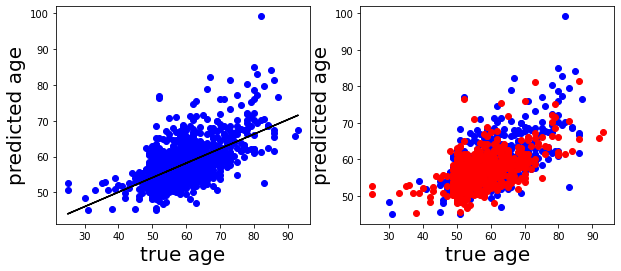

In [ ]:
age_pred_model(reg1) #,"Linear_regressor.pkl")

In [ ]:
scores = cross_val_score(reg1, X_train, y_train, cv=3) # 10-fold cross validation
print(scores)

[0.39219394 0.42907894 0.42902369]


#Random Forest Regression for biological age prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import RandomForestClassifier as rfc
estimators = [ 5, 20, 30,  40,50, 60, 80,100]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = y_train # quick pre-processing of the target
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X_train,yt,cv=5,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 5
Est. explained variance: 0.24 (+/- 0.07)

estimators: 20
Est. explained variance: 0.34 (+/- 0.07)

estimators: 30
Est. explained variance: 0.35 (+/- 0.05)

estimators: 40
Est. explained variance: 0.36 (+/- 0.06)

estimators: 50
Est. explained variance: 0.36 (+/- 0.05)

estimators: 60
Est. explained variance: 0.36 (+/- 0.03)

estimators: 80
Est. explained variance: 0.37 (+/- 0.05)

estimators: 100
Est. explained variance: 0.36 (+/- 0.06)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Train R2-score : 0.92259
Test R2-score : 0.43327
Train CV scores : [0.45556624 0.45710891 0.47344248 0.45902552 0.43387117]
Train CV mean : 0.46
MAE : 4.41478
MSE : 32.2574


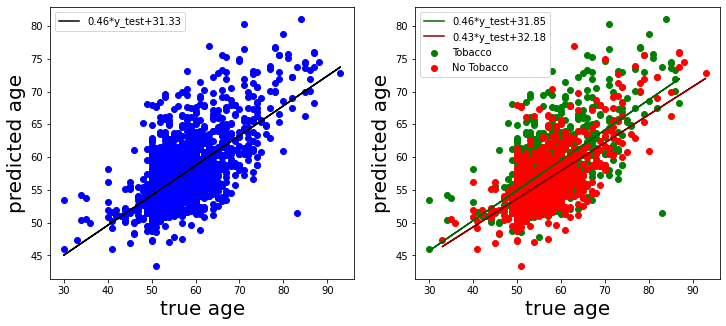

In [ ]:
model = rfr(n_estimators=100,max_depth=None)
model.fit(X_train,y_train)

age_pred_model(model)

#Random Forest Regressor for binary classification

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import RandomForestClassifier as rfc
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = y_train # quick pre-processing of the target
np.random.seed(11111)
for i in estimators:
    model = rfc(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X_train,yt,cv=5) #,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 2
Est. explained variance: 0.63 (+/- 0.08)

estimators: 5
Est. explained variance: 0.70 (+/- 0.12)

estimators: 10
Est. explained variance: 0.71 (+/- 0.12)

estimators: 15
Est. explained variance: 0.76 (+/- 0.08)

estimators: 20
Est. explained variance: 0.72 (+/- 0.12)

estimators: 25
Est. explained variance: 0.74 (+/- 0.08)

estimators: 30
Est. explained variance: 0.74 (+/- 0.11)

estimators: 35
Est. explained variance: 0.73 (+/- 0.08)

estimators: 40
Est. explained variance: 0.74 (+/- 0.10)

estimators: 45
Est. explained variance: 0.75 (+/- 0.09)

estimators: 50
Est. explained variance: 0.75 (+/- 0.12)

estimators: 55
Est. explained variance: 0.74 (+/- 0.12)

estimators: 60
Est. explained variance: 0.74 (+/- 0.10)

estimators: 65
Est. explained variance: 0.76 (+/- 0.06)



In [ ]:
model = rfc(n_estimators=100,max_depth=None)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print("Random Forest prediction accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print("Random Forest prediction log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print("Random Forest prediction auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

NameError: ignored

#Logistic Regression for binary classification

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression


# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

#Below are abandoned code for testing various models and debugging, can ignore them.

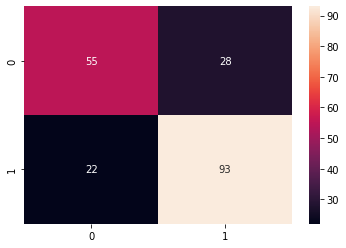

In [ ]:
from sklearn.metrics import confusion_matrix
#Fit the model

cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()
reg.fit(X_train, y_train)
print(reg.score(X_test,y_test))

0.08862539973121575


In [ ]:
scores = cross_val_score(reg, X_train, y_train, cv=3) # 10-fold cross validation
print(scores)

[0.21111438 0.21419725 0.13258752]


In [ ]:
Tobacco

0       0.5
1       0.5
2       0.5
3       1.0
4       1.0
       ... 
9218    0.0
9219    1.0
9220    0.0
9221    0.0
9222    0.5
Name: Tobacco, Length: 9223, dtype: float64

In [ ]:
d_test=y_test-age_dead[y_test.index]
d_pred=reg1.predict(X_test)-age_dead[y_test.index]
plt.figure()
plt.scatter(d_test,d_pred)
print(r2_score(d_test,d_pred))

KeyError: ignored

In [ ]:
age_dead[y_test.index]

4303    70
3026    59
4797    66
1361    67
7448    68
        ..
52      75
6117    77
5785    66
2498    62
365     37
Name: Age at CT, Length: 91, dtype: int64

In [ ]:
cross_val_score(model, X_train, y_train, cv=3)

array([0.33833149, 0.32157019, 0.37671247])

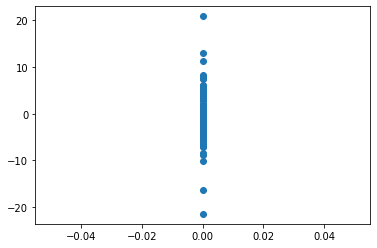

In [ ]:
d_test=y_test-age_dead[y_test.index]
d_pred=model.predict(X_test)-age_dead[y_test.index]
plt.figure()
plt.scatter(d_test,d_pred)

In [ ]:
import seaborn as sns
import matplotlib

#import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [ ]:
y = np.log1p(result.iloc[:,-1])
X=result.iloc[:,:-1]
numeric_feats = X.dtypes[X.dtypes != "object"].index
skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

X[skewed_feats] = np.log1p(X[skewed_feats])

In [ ]:
X

,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),VAT/SAT Ratio,Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median)
1,192.0,485.502857,6.544364,5.217634,5.713761,0.474736,16.150123,123.968745,48.413187,7.904728,52.0
3,149.0,289.108108,6.372448,4.976752,4.984310,0.689350,30.804567,212.296726,69.115854,7.858476,57.0
4,106.0,315.530769,6.379940,5.314771,4.738064,1.024987,-3.181874,168.923950,47.814581,6.069626,53.0
6,77.0,213.537143,6.117839,4.741697,4.614215,0.759555,1.489383,89.505890,30.905415,7.378380,49.0
15,113.0,282.230769,6.265657,5.175570,4.675939,0.976146,8.435009,128.848958,47.270127,9.229692,105.0
...,...,...,...,...,...,...,...,...,...,...,...
8759,167.0,806.529326,7.274615,6.475460,5.072118,1.626911,-15.231386,92.217487,34.896824,6.302954,61.0
8906,259.0,757.449442,7.184669,5.877382,5.997883,0.634561,21.173827,228.256523,76.513477,4.815334,56.0
8942,138.0,339.766667,6.374026,4.990379,5.271853,0.561560,18.209326,70.598145,28.467051,7.896967,55.0
9020,118.0,457.367774,6.836339,5.004986,5.737258,0.391458,8.695780,99.085831,38.695728,0.000000,43.0


In [ ]:
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
#from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [ ]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

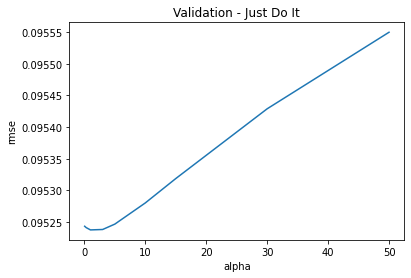

In [ ]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
cv_ridge.argmin()
ridge1=Ridge(alpha = alphas[3])

In [ ]:
rmse_cv(reg1).mean()

4.942532638347851

Train R2-score : 0.44
Test R2-score : 0.44
Train CV scores : [0.44331344 0.40791111 0.41935697 0.43861101 0.45064341]
Train CV mean : 0.43


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


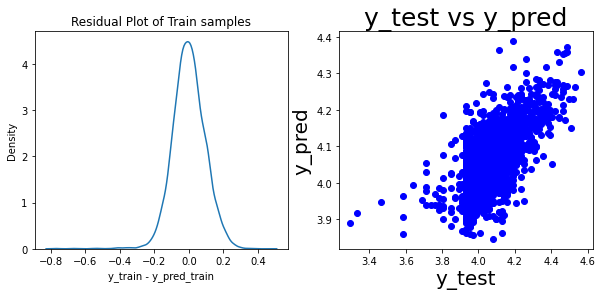

In [ ]:
age_pred_model(ridge1)

In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
rmse_cv(model_lasso).mean()
print(model_lasso.score(X_test,y_test))

0.43302145947540793


In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":4, "eta":0.1}
xgbmodel = xgb.cv(params, dtrain,  num_boost_round=100, early_stopping_rounds=10)

In [ ]:
xgbmodel

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.198693,0.000932,3.198677,0.002340
1,2.879377,0.000845,2.879378,0.002590
2,2.592028,0.000770,2.592058,0.002751
3,2.333446,0.000697,2.333483,0.002870
4,2.100763,0.000637,2.100788,0.002930
...,...,...,...,...
84,0.082196,0.000936,0.094229,0.001275
85,0.082085,0.000931,0.094221,0.001289
86,0.082010,0.000930,0.094227,0.001286
87,0.081857,0.000937,0.094204,0.001267


In [ ]:
#model.loc[20::,["test-rmse-mean", "train-rmse-mean"]].plot()
plt.figure()
plt.plot(y_test,xgbmodel(X_test))

TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
X

,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),VAT/SAT Ratio,Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median)
1,192.0,485.502857,6.544364,5.217634,5.713761,0.474736,16.150123,123.968745,48.413187,7.904728,52.0
3,149.0,289.108108,6.372448,4.976752,4.984310,0.689350,30.804567,212.296726,69.115854,7.858476,57.0
4,106.0,315.530769,6.379940,5.314771,4.738064,1.024987,-3.181874,168.923950,47.814581,6.069626,53.0
6,77.0,213.537143,6.117839,4.741697,4.614215,0.759555,1.489383,89.505890,30.905415,7.378380,49.0
15,113.0,282.230769,6.265657,5.175570,4.675939,0.976146,8.435009,128.848958,47.270127,9.229692,105.0
...,...,...,...,...,...,...,...,...,...,...,...
8759,167.0,806.529326,7.274615,6.475460,5.072118,1.626911,-15.231386,92.217487,34.896824,6.302954,61.0
8906,259.0,757.449442,7.184669,5.877382,5.997883,0.634561,21.173827,228.256523,76.513477,4.815334,56.0
8942,138.0,339.766667,6.374026,4.990379,5.271853,0.561560,18.209326,70.598145,28.467051,7.896967,55.0
9020,118.0,457.367774,6.836339,5.004986,5.737258,0.391458,8.695780,99.085831,38.695728,0.000000,43.0


In [ ]:
X_train[np.isnan(X_train)]

TypeError: ignored

In [ ]:
df.iloc[:,7] = pd.to_numeric(df.iloc[:,7], errors='coerce')
df.iloc[:,12] = pd.to_numeric(df.iloc[:,12], errors='coerce')

In [ ]:
df.isna().sum()

Age at CT                                    0
DEATH [d from CT]                            0
L1_HU_BMD                                   47
TAT Area (cm2)                             132
Total Body                Area EA (cm2)    132
VAT Area (cm2)                             132
SAT Area (cm2)                             132
VAT/SAT     Ratio                          133
Muscle HU                                   28
 Muscle Area (cm2)                          28
L3 SMI (cm2/m2)                            152
AoCa        Agatston                         1
Liver HU    (Median)                        74
Death                                        0
dtype: int64

In [ ]:
df['Death'].value_counts()

0.0    8674
1.0     549
Name: Death, dtype: int64

### Filling NA with mean

In [ ]:
for i in range(2,13):
    df.iloc[:,i].fillna(value=df.iloc[:,i].mean(),inplace = True)



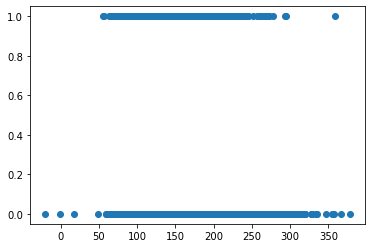

In [ ]:
plt.scatter(df['L1_HU_BMD'],df['Death'])

In [ ]:
df.head()

,Age at CT,DEATH [d from CT],L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),VAT/SAT Ratio,Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),Death
0,73,967.0,135.0,377.707843,672.206853,172.990969,208.044913,0.907249,18.2,170.1,58.7,5473.6,35.0,1.0
1,55,359.0,192.0,485.500000,694.300000,183.500000,302.000000,0.610000,16.2,124.0,48.4,2709.1,52.0,1.0
2,52,0.0,256.0,490.100000,706.100000,159.700000,330.300000,0.480000,23.3,136.6,50.1,0.0,54.0,0.0
3,60,2351.0,149.0,289.100000,584.500000,144.000000,145.100000,0.990000,30.8,212.3,69.1,2586.6,57.0,1.0
4,88,658.0,106.0,315.500000,588.900000,202.300000,113.200000,1.790000,-3.2,168.9,47.8,431.5,53.0,1.0


### Box plots for binary target "Death" vs Features:



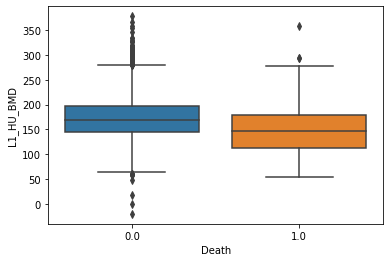

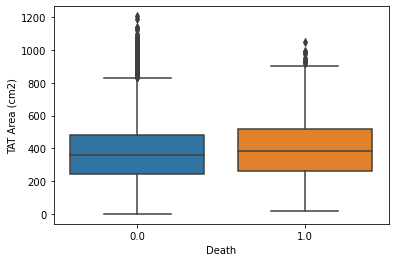

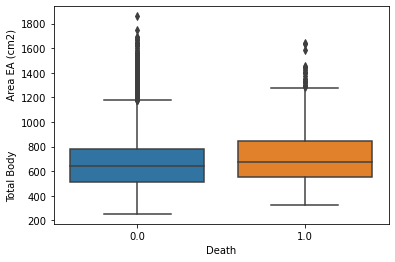

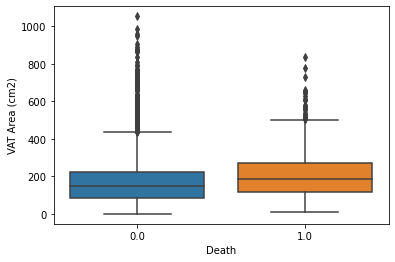

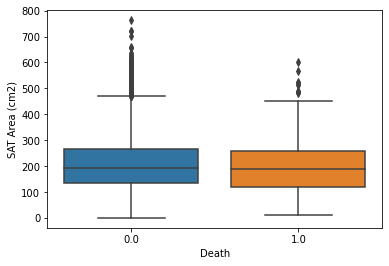

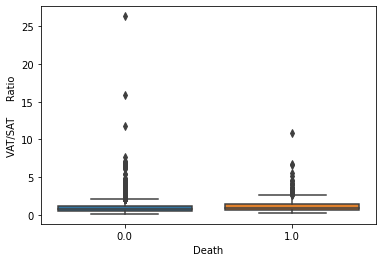

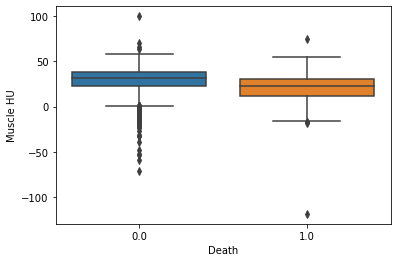

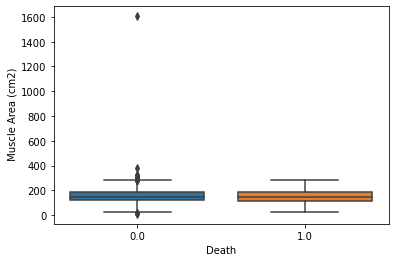

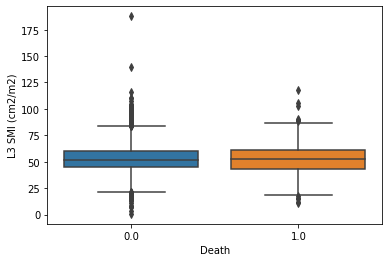

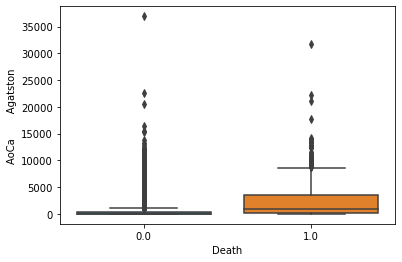

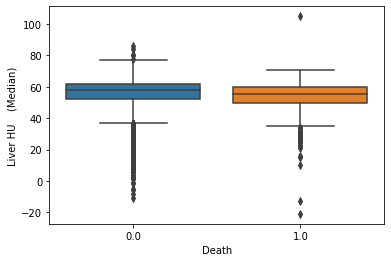

In [ ]:
for i in range(2,13):
    sns.boxplot(y=df.iloc[:, i], x = df.iloc[:, 13])
    plt.show()
    

### Finding correlation

#### 1) Correaltion map for all features

In [ ]:
df.corr()

,Age at CT,DEATH [d from CT],L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),VAT/SAT Ratio,Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),Death
Age at CT,1.000000,0.220922,-0.397985,0.086886,0.076372,0.149461,-0.012550,0.155591,-0.394999,-0.087537,-0.077201,0.463678,-0.053401,0.258936
DEATH [d from CT],0.220922,1.000000,-0.102516,0.042707,0.049737,0.074405,-0.007204,0.082251,-0.126657,-0.000059,0.006967,0.187435,-0.030077,0.858630
L1_HU_BMD,-0.397985,-0.102516,1.000000,-0.075333,-0.073394,-0.095122,-0.025382,-0.085399,0.244097,0.006157,0.052537,-0.212457,0.036257,-0.119917
TAT Area (cm2),0.086886,0.042707,-0.075333,1.000000,0.949176,0.845129,0.834815,0.257692,-0.417979,0.427064,0.477668,0.131480,-0.422037,0.038930
Total Body Area EA (cm2),0.076372,0.049737,-0.073394,0.949176,1.000000,0.880546,0.703767,0.398048,-0.333827,0.528752,0.532171,0.140411,-0.444809,0.054751
VAT Area (cm2),0.149461,0.074405,-0.095122,0.845129,0.880546,1.000000,0.443216,0.624821,-0.279283,0.505943,0.492592,0.188362,-0.420875,0.080235
SAT Area (cm2),-0.012550,-0.007204,-0.025382,0.834815,0.703767,0.443216,1.000000,-0.210891,-0.435583,0.191331,0.297422,0.021786,-0.279891,-0.021134
VAT/SAT Ratio,0.155591,0.082251,-0.085399,0.257692,0.398048,0.624821,-0.210891,1.000000,0.013961,0.328425,0.247698,0.165617,-0.195152,0.108449
Muscle HU,-0.394999,-0.126657,0.244097,-0.417979,-0.333827,-0.279283,-0.435583,0.013961,1.000000,0.148840,0.076750,-0.244967,0.201559,-0.167428
Muscle Area (cm2),-0.087537,-0.000059,0.006157,0.427064,0.528752,0.505943,0.191331,0.328425,0.148840,1.000000,0.834085,0.054744,-0.249978,-0.019083


In [ ]:
df.columns.values[2]

'L1_HU_BMD'

#### 2) Correlation between binary target "Death" and Feature variables

In [ ]:
for i in range(2,13):
    print("Correlation between binary target Death and " + df.columns.values[i])
    print(stats.pointbiserialr(y=df.iloc[:, i], x = df.iloc[:, 13]))
    print()
    

Correlation between binary target Death and L1_HU_BMD
PointbiserialrResult(correlation=-0.11991657701967799, pvalue=6.842336823726933e-31)

Correlation between binary target Death and TAT Area (cm2)
PointbiserialrResult(correlation=0.038930002481021575, pvalue=0.00018430592562994016)

Correlation between binary target Death and Total Body                Area EA (cm2)
PointbiserialrResult(correlation=0.05475093906757612, pvalue=1.4302515116274858e-07)

Correlation between binary target Death and VAT Area (cm2)
PointbiserialrResult(correlation=0.08023472199783793, pvalue=1.1923363909905349e-14)

Correlation between binary target Death and SAT Area (cm2)
PointbiserialrResult(correlation=-0.021134043776809826, pvalue=0.04239821876736317)

Correlation between binary target Death and VAT/SAT     Ratio
PointbiserialrResult(correlation=0.10844884990349934, pvalue=1.5535811848642484e-25)

Correlation between binary target Death and Muscle HU
PointbiserialrResult(correlation=-0.16742751386017007

### Random forest classifier which predicts the target binary variable "Death"

In [ ]:
X = np.array(df.iloc[:,2:13])
Y = np.array(df.iloc[:,-1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20)

In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9409214092140922


<AxesSubplot:>

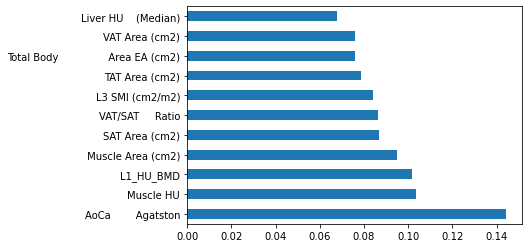

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=df.columns[2:13])
feat_importances.nlargest(20).plot(kind='barh')


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1725,    5],
       [ 113,    2]])

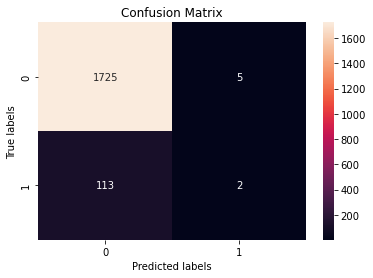

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

### Bagging classfier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
model = BaggingClassifier()
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9376693766937669


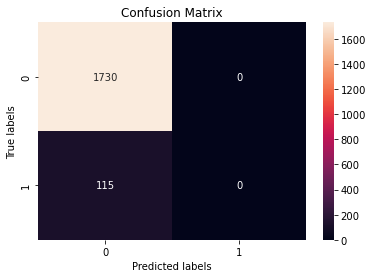

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);